In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding = 'ISO-8859-1')

df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [4]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [5]:
df['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

Este dataset contiene una serie de datos de los equipos de primera división de 5 ligas europeas: Inglaterra, España, Alemania, Francia e Italia.

A primera vista podemos reconocer algunas de las variables, como por ejemplo el nombre del equipo ('Squad') y el lugar que ocupan en cada liga ('LgRk') y entre todas las ligas ('Rk'), o cuántos partidos han ganado ('W'), perdido ('L') y empatado ('D').

Entre otros cosas, también podemos saber el número de partidos que han jugado ('MP'), dato que nos pertime deducir que se trata de una temporada entera en cada uno de estos países. Sin embargo, el año exacto en el que se jugó esta liga no lo sabemos, pero por el nombre de los jugadores más goleadores ('Top Team Scorer') o el portero ('Goalkeeper'), podemos saber que es reciente.

Por otro lado, hay otras variables que inicialmente no reconozco, pero tras consultar su significado puedo ver que se trata de la expectativa de goles a marcar ('xG'), también de la expectativa de goles a recibir ('xGA') o de la diferencia entre estos dos anteriores ('xGD') durante la temporada entera, pero también de esta misma diferencia en un mismo partido ('xGD/90'). Sin embargo, los datos que han servido para generar estas variables no se nos facilitan, ya que se requiere entre otras cosas de la efectividad de los tiros a puerta.

Finalmente, también tenemos la asistencia ('Attendance'), aunque por el número que muestran posiblemente se trata de la asistencia de último partido jugado como equipo local.

In [6]:
df.sort_values(by='Attendance' and 'Country', ascending=False)[:20]
#df.loc[df['Country'] == 'ENG'].head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
77,78,Spezia,ITA,15,37,10,6,21,41,68,...,36,0.97,37.3,66.6,-29.3,-0.79,L L L L W,6380,Daniele Verde - 8,Ivan Provedel
11,12,Juventus,ITA,4,36,20,9,7,55,33,...,69,1.92,50.5,35.4,15.2,0.42,W D W W L,21627,Paulo Dybala - 10,Wojciech Szcz?sny
29,30,Roma,ITA,6,37,17,9,11,56,43,...,60,1.62,61.1,37.8,23.3,0.63,D L D L D,40745,Tammy Abraham - 15,Rui Patrício
31,32,Atalanta,ITA,8,37,16,11,10,65,47,...,59,1.59,62.4,44.8,17.6,0.48,W D D W L,10047,Mario Paali? - 13,Juan Musso
21,22,Lazio,ITA,5,36,18,8,10,72,53,...,62,1.72,52.3,45.8,6.5,0.18,W D L W W,21235,Ciro Immobile - 27,Thomas Strakosha
63,64,Bologna,ITA,13,37,11,10,16,43,55,...,43,1.16,43.1,53.2,-10.1,-0.27,D W D L L,13845,Marko Arnautovi? - 14,?ukasz Skorupski
60,61,Udinese,ITA,12,37,10,14,13,57,58,...,44,1.19,50.6,50.2,0.4,0.01,D W L D L,11655,Gerard Deulofeu - 12,Marco Silvestri
84,85,Sampdoria,ITA,16,36,9,6,21,42,59,...,33,0.92,34.5,53.3,-18.8,-0.52,L L D W L,8756,Francesco Caputo - 11,Emil Audero
40,41,Hellas Verona,ITA,9,37,14,10,13,62,56,...,52,1.41,50.2,46.5,3.7,0.10,W D W L L,12343,Giovanni Simeone - 16,Lorenzo Montipò
28,29,Fiorentina,ITA,7,36,18,5,13,56,47,...,59,1.64,55.4,42.4,12.9,0.36,W L L L W,19801,Duan Vlahovi? - 17,Pietro Terracciano


Una vez nos hemos hecho una idea del dataset, procedemos a comprobar que efectivamente los tipos de datos coinciden con lo que deberían representar y que no hay valores nulos.

In [7]:
df.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [8]:
pd.isnull(df).sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Ahora ya podemos proceder a seleccionar un atributo, pero al mismo tiempo también determinar la normalidad de los datos que contiene dicho atributo.

Por lo tanto, podemos plantear las siguientes hipótesis nula y alternativa:

    - Hipótesis nula: El atributo 'GA' tiene una distribución Gausiana (normal).
    - Hipóteis alternativa: El atributo 'GA' NO tiene una distribución Gausiana (normal).
    
Podemos comprobar esta hipótesis tanto gráficamente con, por ejemplo, un histograma, como también con un test estadístico. En este último caso el test de Shapiro-Wilk, entre otros, es adecuado para ver si la muetsra dispone de una distribución normal o no.

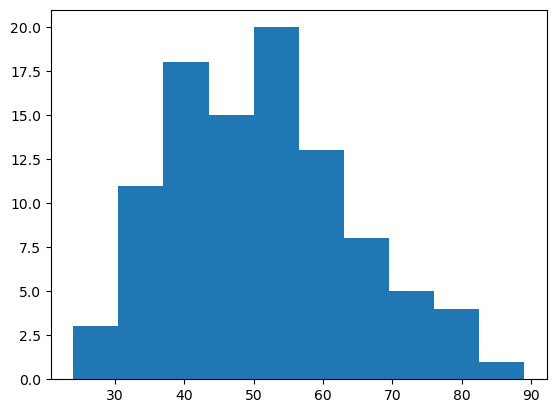

In [9]:
import matplotlib as pyplot

plt.hist(df['GA'])
plt.show()

In [10]:
from scipy.stats import shapiro

data = df['GA']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print(stat, p)

stat=0.983, p=0.243
Probably Gaussian
0.9831355214118958 0.2431538999080658


Tras haber realizado ambas pruebas confirmamos la distribución normal del atributo que hemos elegido, por lo que procedemos al siguiente ejercicio y comprobamos si dos variables están relacionadas. Para ello, podemos recurrir al coeficiente de correlación de Pearson.

De esta manera sabemos si están relacionadas las variables de la expectativa de recibir goles en contra ('xGA') y los goles en contra efectivos ('GA'). Las dos hipótesis:

    - Hipótesis nula: La expectativa de recibir goles en contra ('xGA') está relacionada con los goles en contra efectivos ('GA').
    - Hipótesis alternativa: La expectativa de recibir goles en contra ('xGA') NO se relaciona con los goles en contra efectivos ('GA').
    
Recurrimos a este test, ya que ambas variables son del mismo tipo, están distribuidas de manera normal y además disponen de parámetros con valores similares.

In [11]:
df['GA'].describe()

count    98.000000
mean     50.877551
std      13.634602
min      24.000000
25%      40.000000
50%      50.000000
75%      59.000000
max      89.000000
Name: GA, dtype: float64

In [12]:
df['xGA'].describe()

count    98.000000
mean     48.645918
std       9.812481
min      26.800000
25%      41.300000
50%      47.750000
75%      54.700000
max      73.300000
Name: xGA, dtype: float64

In [13]:
from scipy.stats import pearsonr

data1 = df['GA']
data2 = df['xGA']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.862, p=0.000
Probably dependent


Para concluir, incorporamos una tercera variable a las dos anteriores para ver si son también similares, como, por ejemplo, los puntos ('Pts') que consigue un equipo en su liga nacional. Planteemos las hipótesis:

    - Hipótesis nula: Las medias de las muestras son iguales.
    - Hipótesis alternativa: Una o más de las medias de las muestras NO son iguales.

In [14]:
from scipy.stats import f_oneway

data3 = df['Pts']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.674, p=0.511
Probably the same distribution


<Axes: >

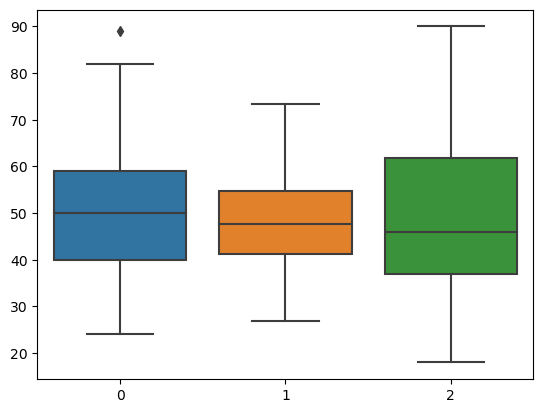

In [15]:
sns.boxplot(data=[data1, data2, data3])

In [16]:
df['Pts'].describe()

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64